<a href="https://colab.research.google.com/github/pravali96/Feature-Engineering/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

**Before you start:** Read Chapter 3 Data Visualization and Chapter 4 Dimension Reduction in the textbook.

**Note:** Please make sure your plots are complete and presentable with a title, proper axis names, labels and legends if applicable.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start. 

Alternative solutions are welcomed.

## Part 1: Advanced Data Visualization

### Problem 1 ##

**Dataset:** [Mismanaged waste](https://ourworldindata.org/grapher/mismanaged-plastic-waste?tab=chart&time=earliest..latest)

**Introduction:** Jambeck et al. quantified municipal and plastic waste streams from coastal populations in 2010 with projections to the year 2025. The authors define mismanaged and inadequately managed waste as follows: "mismanaged waste is material that is either littered or inadequately disposed. Inadequately disposed waste is not formally managed and includes disposal in dumps or open, uncontrolled landfills, where it is not fully contained. Mismanaged waste could eventually enter the ocean via inland waterways,
wastewater outflows, and transport by wind or tides. "

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("mismanaged-waste-global-total.csv") 
df.head()

Saving mismanaged-waste-global-total.csv to mismanaged-waste-global-total (1).csv


,Entity,Code,Year,Mismanaged waste (% global total) (% of global total)
0,Albania,ALB,2010,0.0933
1,Algeria,DZA,2010,1.6347
2,Angola,AGO,2010,0.1964
3,Anguilla,AIA,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.0039


In [ ]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Mismanaged waste (% global total) (% of global total)'],
      dtype='object')

In [ ]:
#TODO:
#Use a choropleth map to present the amount of mismanaged waste by country
import plotly.express as px
fig = px.choropleth(df, locations="Code",
                    color="Mismanaged waste (% global total) (% of global total)", 
                    hover_name='Entity', 
                    color_continuous_scale='reds')
fig.show()
#The label(hover) should include the country name and percentage of mismanaged waste
#Interpret your key findings from the map graph
'''
East Asian countries- China, Indonesia, Philippines, Vietnam, Cambodia seem to be having 
the most managed waste percentages
'''

**Hint:** 

* The variable "code" contains [three letters ISO country codes](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3). 
* [Use the built-in country code to create a choropleth map.](https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries)



### Problem 2 ##

**Dataset:** [Plastic disposal dataset](https://ourworldindata.org/plastic-pollution)

**Information:** Plastic disposal dataset methods shows how has global plastic waste disposal method changed over time. In the chart we see the share of global plastic waste that is discarded, recycled or incinerated from 1980 through to 2015.


In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("activity.xlsx") 
df.head()

Saving activity.xlsx to activity.xlsx


,year,Value,Type
0,1960,88.1,Generation
1,1960,NaN,Composting*
2,1960,5.6,Recycling
3,1960,0.0,Combustion with energy recovery
4,1960,82.5,Landfilling and other disposal


In [ ]:
#TODO:
#Use an animated bar chart to indicate the change of trash disposal method throughout the years
#Interpret your key findings from the graph
fig = px.bar(df, x="Type", y="Value", color="Type",
  animation_frame="year", animation_group="Type", range_y=[0,300])
fig.show()

**Hint:** [Animated Bar Charts with Plotly Express](https://plotly.com/python/animations/#animated-bar-charts-with-plotly-express)




### Problem 3 ##

**Dataset:** [Global Fortune 500](https://www.kaggle.com/edgarhuichen/fortune-global-500)

**Introduction:** Fortune Global 500 List is a list of largest corporations worldwide which are measured by their total fiscal year revenues. Companies rankings sorted by total revenues for their respective fiscal years ended on or before March 31 of the relevant year.

In [ ]:
#Upgrade the package "plotly" before you start to avoid future syntax error
#You only need to upgrade it once
!pip install plotly --upgrade


Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.3)


In [ ]:
#Import packages
import pandas as pd
import numpy as np
import plotly.express as px

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Global Fortune 500.csv") 
df.head()

Saving Global Fortune 500.csv to Global Fortune 500 (2).csv


,Rank,Company Name,Country,Number of Employees,Previous Rank,Revenues($millions),Revenue Change,Profits($millions),Profit Change,Assets($millions),Unnamed: 10,Unnamed: 11
0,1,Walmart,USA,"2,300,000",1,485873,0.80%,13643,-7.20%,198825,NaN,NaN
1,2,State Grid,China,"926,067",2,315199,-4.40%,9571.3,-6.20%,489838,NaN,NaN
2,3,Sinopec Group,China,"713,288",4,267518,-9.10%,1257.9,-65.00%,310726,NaN,NaN
3,4,China National Petroleum,China,"1,512,048",3,262573,-12.30%,1867.5,-73.70%,585619,NaN,NaN
4,5,Toyota Motor,Japan,"364,445",8,254694,7.70%,16899.3,-12.30%,437575,NaN,NaN


In [ ]:
df.columns

Index(['Rank', 'Company Name', 'Country', 'Number of Employees',
       'Previous Rank', 'Revenues($millions)', 'Revenue Change',
       'Profits($millions)', 'Profit Change', 'Assets($millions)',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [ ]:
#TODO:
#Build a treemap of the companies with "country" as the first hierarchy and "company" as the second hierarchy
#The size of each block should indicate the corresponding company's revenue
#Interpret your key findings from the treemap
import plotly.express as px
fig = px.treemap(df, path=['Country', 'Company Name'], 
                 values='Revenues($millions)') 
fig.update_layout(margin=dict(t=10, b=10, r=10, l=10))
fig.show() 
# Using tree maps, we can identify the top revenue generating companies from each countries. Size of the the company represents the revenue created by the company
# USA has the most number of companies than any other country and is ahead of the others in terms of revenue followed by the China.
# We can interpret that Walmart has the higheest revenue in USA, State Grid in China, Toyota Motor in Japan amd so on.

**Hint:** [Build a treemap with Plotly](https://plotly.com/python/treemaps/)




### Problem 4 ##

**Dataset:** [Air Quality](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

**Introduction:** The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

In [ ]:
#Import required libraries
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
%matplotlib inline
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("Air Quality.xlsx") 
df.head()

Saving Air Quality.xlsx to Air Quality (1).xlsx


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


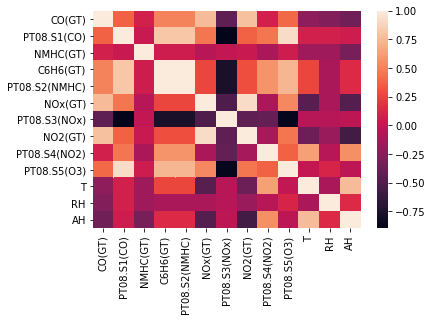

In [ ]:
import seaborn as sns
df=df.corr(method ='kendall')
fig=sns.heatmap(df)

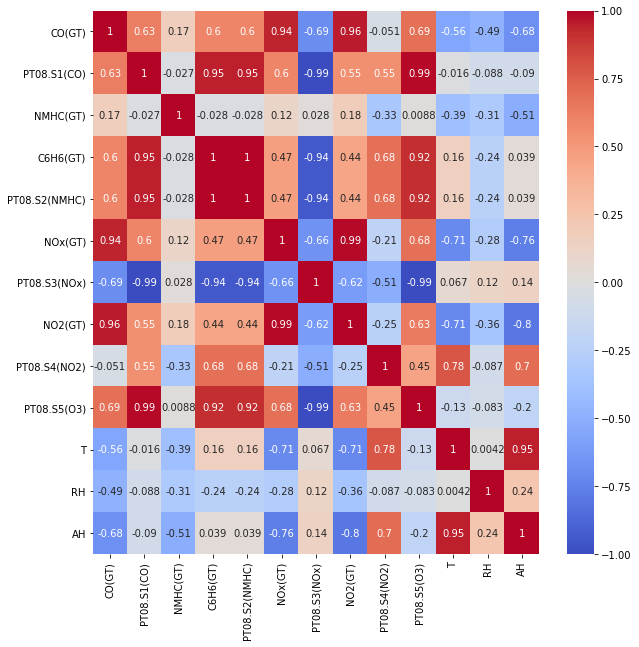

In [ ]:
#TODO:
#Plot a correlation heatmap for the Air Quality dataset
#Interpret your key findings from the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot = True)
# There is a positive correlation between (CO, NO2), (PT08S1, P208S5), (AH, T) and other variables.
# PT08.S3(NOx) has an inverse correlation with a lot of other gases
#PT08 S1(CO) has a positive correlation with a ceratin set of gases and strong inverse correlation with PT08.S3(NOx)

**Hint:** [Build a heatmap with Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Part 2: Dimension Reduction

### Problem 5

**Dataset:** [Wine Classification Dataset](https://archive.ics.uci.edu/ml/datasets/wine)

**Introduction:** These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


In [ ]:
#Import the built-in dataset (Wine recognition) for this problem
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=8)
wine = load_wine()
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = wine['target']
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
#TODO:
#Compute the first two principal component scores with eigen values and vectors
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
cov_mat = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('First 2 eigen pairs in descending order:')
for i in range(0,2):
    print(eig_pairs[i])

First 2 eigen pairs in descending order:
(99201.78951748088, array([-0.00165926,  0.00068102, -0.00019491,  0.0046713 , -0.01786801,
       -0.00098983, -0.00156729,  0.00012309, -0.00060061, -0.00232714,
       -0.00017138, -0.00070493, -0.99982294]))
(172.5352664778914, array([-0.00120341, -0.00215498, -0.00459369, -0.02645039, -0.99934419,
       -0.00087796,  0.00005185,  0.00135448, -0.0050044 , -0.01510035,
        0.00076267,  0.00349536,  0.01777381]))


In [ ]:
#TODO:
#Use PCA() on the RAW data to calculate the priciple components
#For each principle component, what is the explained variance, proportion variance, and cummulative proportion of variance?
#Show the first two principal component scores
pca=PCA()
pca.fit(X)
pca_data=pca.transform(X)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
print('explained variance:', pca.explained_variance_, '\nProportion of variation:', pca.explained_variance_ratio_, '\nStandard Deviation:',  np.sqrt(pca.explained_variance_),
     '\nCumulative Proportion of variation:', np.cumsum(pca.explained_variance_ratio_))
component_scores = pd.Series(pca.components_[0])
sorted_scores = component_scores.abs().sort_values(ascending=False)
top_2_scores = sorted_scores[0:2].index.values
print('First 2 scores:\n', component_scores[top_2_scores])
#Almost 99.80% of the variance is covered in the 1st component and
#0.17% of the variance is covered in the 2nd component.

explained variance: [99201.78951748   172.53526648     9.4381137      4.99117861
     1.22884523     0.84106387     0.27897352     0.15138127
     0.11209676     0.0717026      0.03757598     0.02107237
     0.0082037 ] 
Proportion of variation: [0.99809123 0.00173592 0.00009496 0.00005022 0.00001236 0.00000846
 0.00000281 0.00000152 0.00000113 0.00000072 0.00000038 0.00000021
 0.00000008] 
Standard Deviation: [314.96315581  13.13526804   3.07215132   2.23409458   1.10853292
   0.91709534   0.52817944   0.38907746   0.33480855   0.26777342
   0.19384524   0.14516324   0.0905743 ] 
Cumulative Proportion of variation: [0.99809123 0.99982715 0.99992211 0.99997232 0.99998469 0.99999315
 0.99999596 0.99999748 0.99999861 0.99999933 0.99999971 0.99999992
 1.        ]
First 2 scores:
 12    0.999823
4     0.017868
dtype: float64


In [ ]:
#TODO:
#Use PCA() on the STANDARDIZED data to calculate the priciple components
#For each principle component, what is the explained variance, proportion variance, and cummulative proportion of variance?
#Show the first two principal component scores
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaled_data = preprocessing.scale(X)
pca=PCA(n_components=2)
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
print('explained variance:', pca.explained_variance_, '\nProportion of variation:', pca.explained_variance_ratio_, '\nStandard Deviation:',  np.sqrt(pca.explained_variance_),
     '\nCumulative Proportion of variation:', np.cumsum(pca.explained_variance_ratio_))
component_scores = pd.Series(pca.components_[0])
sorted_scores = component_scores.abs().sort_values(ascending=False)
top_2_scores = sorted_scores[0:2].index.values
print('First 2 scores:\n', component_scores[top_2_scores])
#  Almost 36% of the variance is covered in the 1st component and
#  19% of the variance is covered in the 2nd component.

explained variance: [4.73243698 2.51108093] 
Proportion of variation: [0.36198848 0.1920749 ] 
Standard Deviation: [2.17541651 1.58463905] 
Cumulative Proportion of variation: [0.36198848 0.55406338]
First 2 scores:
 6    0.422934
5    0.394661
dtype: float64


In [ ]:
#TODO:
#Explain why it is important to normalize numerical variables before PCA
#Back up your reasons with the PCA results above
# If we dont normalize the data, variables with larger values will tend to dominate variables with lesser values. PCA analysis will be imbalanced.
# In the first case, most of the variation was captured in Proline and Magnesium since they have larger values compared to the rest.
# After scaling the data, all the values are centered to a mean of 0 and standard dev of 1. Hence, there is no dominition
# Flavanoids capture most of the variation.

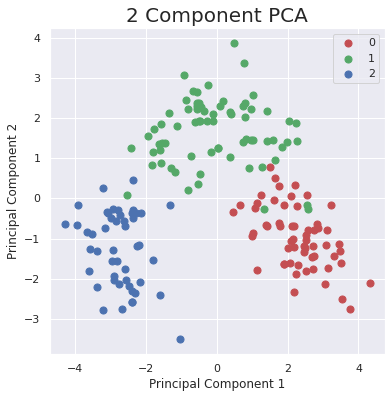

In [ ]:
#TODO:
#Plot the records on a 2D plane defined by the first two PCs calculated with standardized data
#Use color to differentiate the classes of wine (variable name "target")
#Interpret the plot
x = StandardScaler().fit_transform(X)
y = pd.DataFrame(y, columns=['target'])
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
pc_data = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])
y[['target']].head()
finalDf = pd.concat([pc_data, y], axis = 1)
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12
              )
ax.set_title('2 Component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
# Using PCA, we can capture most of the variation into 2 components. Just with these 2 components, we can cluster the data into 3 clusters and observe outliers and patterns 

### Problem 6

**Dataset:** Life Expectancy

**Introduction:** The above dataset gives life expectancy related data for 37 countries in2014. 

Consider only the following variables in your analysis: 'GDP', 'Income composition of resources', 'Schooling', and 'Total expenditure'.

In [ ]:
#Import useful package
from sklearn.manifold import MDS
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Life Expectancy.csv") 
df.head()


Saving Life Expectancy.csv to Life Expectancy (1).csv


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Australia,2014,Developed,82.7,6,1,9.71,10769.363050,91.0,340,66.1,1,92,9.42,92,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
2,Austria,2014,Developed,81.4,66,0,12.32,8350.193523,98.0,117,57.1,0,98,11.21,98,0.1,51322.639970,8541575.0,1.8,2.0,0.892,15.9
3,Bangladesh,2014,Developing,71.4,132,98,0.01,10.446403,97.0,289,17.7,121,97,2.82,97,0.1,184.565430,15945279.0,18.1,18.6,0.570,10.0
4,Belgium,2014,Developed,89.0,76,0,12.60,7163.348923,98.0,70,63.4,1,99,1.59,99,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3


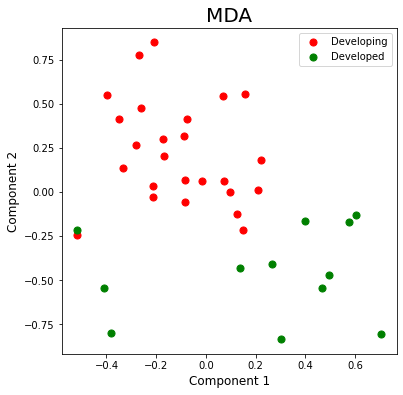

In [ ]:
#TODO
#Run MDS() (Multi Dimensional Scaling) on the selected data frame
#Plot data points on a 2D plane defined by the first two components
#Use color to differentiate the statues of each country
#Use text label to specify the country name for each point
#Comment your findings from the graph
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
# Considering 'GDP', 'Income composition of resources', 'Schooling', and 'Total expenditure'.
Y=df[['Status']]
X = df[['GDP', 'Income composition of resources', 'Schooling', 'Total expenditure']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
mds = MDS(2, random_state=5)
X_data = mds.fit_transform(X_scaled)
m_data= pd.DataFrame(data=X_data, columns= ['comp1','comp2'])
finalDf = pd.concat([m_data, Y], axis = 1)
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 12)
ax.set_ylabel('Component 2', fontsize = 12)
ax.set_title('MDA', fontsize = 20)
Status = ['Developing','Developed']
colors = ['r', 'g']
for status, color in zip(Status,colors):
    indicesToKeep = finalDf['Status'] == status
    ax.scatter(finalDf.loc[indicesToKeep, 'comp1']
               , finalDf.loc[indicesToKeep, 'comp2']
               , c = color
               , s = 50)
ax.legend(Status)


,comp1,comp2
0,-0.512153,-0.268475
1,0.881289,-0.074322
2,0.636290,-0.334346
3,-0.482426,0.247466
4,0.429009,0.526614
5,-0.319307,0.213691
6,0.036815,-0.213713
7,-0.416199,-0.018720
8,0.114660,0.558601
9,-0.872271,-0.006825
